In [ ]:
#Madeline Martine

We will start this report by importing our excel data sheet containing information from an auto insurance company KSM is looking into.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#loading data from excel sheet into pandas dataframe
df = pd.read_excel('insurance.xlsx', sheet_name='Auto_Insurance_Claims_Sample')

Now that the data has been loaded into a dataframe, we can display some general stats about the data before processing the data any further:

In [2]:
#here we are displaying the general stats of the dataframe and saving the resulting table into a new variable
df_stats1 = df.describe()
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,6817.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,50456.580461,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,24305.956566,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,28432.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,48081.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,70187.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Since we know that there is missing income data for clients who are unemployed and we know that unemployed clients' typical income is comparable to that of employed clients, we will calculate the average income for employed clients:

In [3]:
#the following line locates all drivers who are employed and then calculates the mean of their income
replacement_val = df.loc[df['EmploymentStatus'] == 'Employed']['Income'].mean()

We can now fill the empty income values for unemployed clients with this average income:

In [4]:
#here we are filling all missing values in the income column with the previously calculate average
df['Income'] = df['Income'].fillna(int(replacement_val))

Now that we have accounted for the missing data, we will display the same general stats as above and see how they differ:

In [5]:
#we are again displaying the general stats of the dataframe after filling in the missing values and saving the resulting table
#to a new variable
df_stats2 = df.describe()
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,51960.174841,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,21155.468547,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,34337.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,56384.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


To better visualize the differences in the general stats and to understand the impact of accounting for missing values, we will plot the difference of each stat for the income data:

<font color = 'red'> As we can see, replacing the missing values with an approximated value has created a difference in each of the general stats except for the minimum and maximum. We did not expect a difference in these two stats because we only introduced a mean value to the dataframe - nothing that would become the new min or max. We can now expect the updated general stats to be more accurate because they are not being thrown off by the presence of missing income values from unemployed clients. </font>

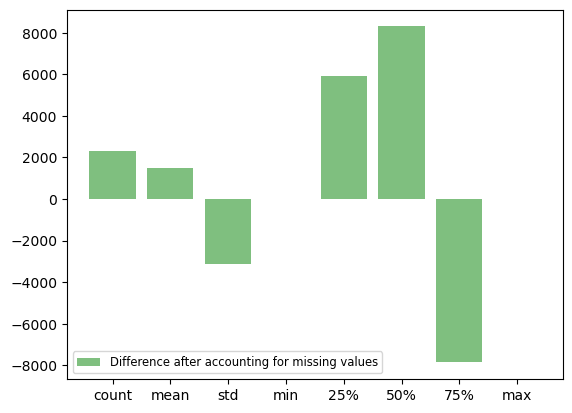

In [6]:
x = list(df_stats1.index) #we locate all the row labels and store them in a list
y = [] #initializing empty list

#the following for loop subracts the general stats results of the first description table from that of the second table to show
#how filling in missing values affects the count, mean, std, min, 25%, 50%, 75%, and max
for row in x: #going through each general stat
    difference = df_stats2['Income'].loc[str(row)] - df_stats1['Income'].loc[str(row)] #subtracting the two values
    y.append(difference) #storing the differnces in list

#now we plot the differences against the general stat names in a bar chart
plt.bar(x,y,color='green',alpha=.5,label='Difference after accounting for missing values')
plt.legend(loc='lower left',fontsize='small')
plt.show()

Now we will address some “conventional wisdoms” regarding drivers, automobiles, and their insurance/driving behavior, starting with the notion that Mother Nature trumps human mess-ups.

We can start by visualizing the the breakdown of claim reasons to see how many claims there are attributed to hail vs. any other reason.

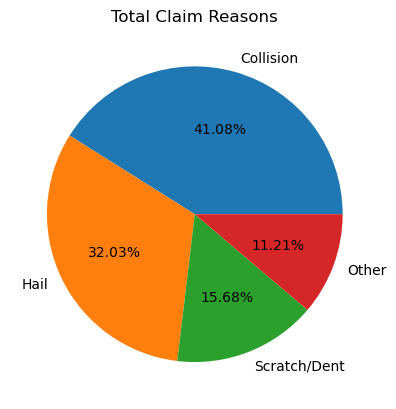

In [7]:
#sums will group all the different claim reasons and count them
sums = df['Claim Reason'].value_counts()

labels = list(sums.keys()) #creating list of claim reasons
y = [i for i in sums[labels]] #list comprension to create list of the counts for each claim reason

#plotting the percentages of the whole for claim reasons in a pie chart
plt.pie(y,labels=labels,autopct='%1.2f%%')
plt.title('Total Claim Reasons')
plt.show()

Now we will look at the average claim amount for each of these claim reasons below.

<font color = 'red'>We can clearly see that hail makes up a large portion of all claim reasons, but even more claims are attributed to collision. The disparity is even greater if we consider the number of claims attributed to hail vs. the number attributed to ANY other reason; hail only makes up for about a third of the total.</font>

<font color = 'red'>Below we can see the average claim amount for claims atributed to hail vs. claims attributed to other reasons. The average claim amount for claims attributed to hail is lower than that of collision or scratch/dent. Overall, from our data we can conclude that this conventional wisdom does not really hold any water because the number (and average claim amount) of human mess-ups exceeds that of "Mother Nature".</font>

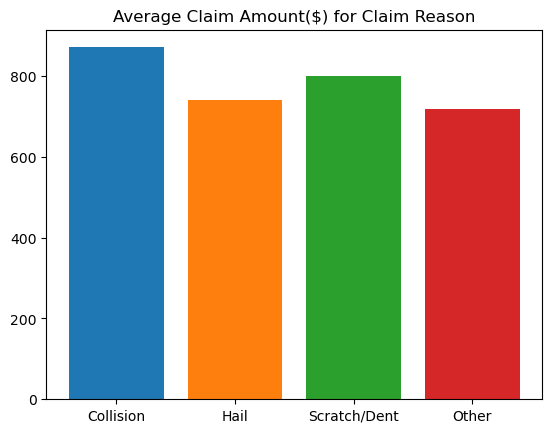

In [8]:
y = [] #initialize empty list

#the for loop will loop through the same claim reasons as before
for reason in labels:
    total=df.loc[df['Claim Reason']==reason,'Claim Amount'].mean() #calculating the average claim amount for each claim reason
    y.append(total) #adding the average to the list

#now we plot claim reasons against average claim amounts in a bar chart
plt.bar(labels,y,color=['tab:blue','tab:orange','tab:green','tab:red'])
plt.title('Average Claim Amount($) for Claim Reason')
plt.show()

Now we will address the notion that people who buy more expensive policies tend to have higher cost claims.

<font color = 'red'>From the graph below, we can see a steady and almost linear rise in average claim amount starting from the cheapest policy (basic) to the most expensive policy (premium). From this we can conclude that this conventional wisdom is accurate.</font>

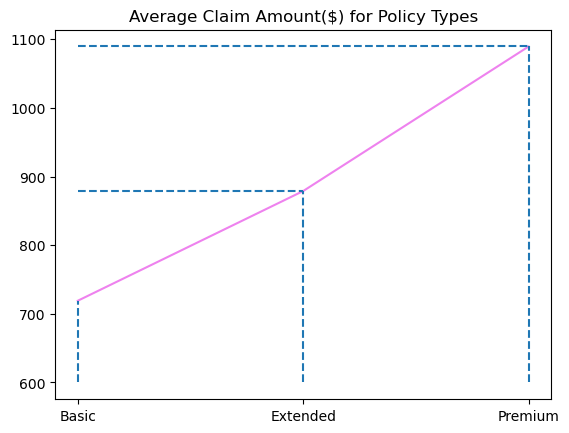

In [9]:
#policies will group all coverage types and provide a count for each of them
policies = df['Coverage'].value_counts()
labels = list(policies.keys()) #list of row labels/coverage types

y = [] #initialize empty list

#the for loop will loop through for each coverage type
for reason in labels:
    total=df.loc[df['Coverage']==reason,'Claim Amount'].mean() #calculates the average claim amount for each coverage type
    y.append(total) #adding average to the list
    
#Now we will plot the coverage types vs average claim amounts in a line plot    
plt.plot(labels,y,c='violet')
plt.vlines(labels, 600, y, linestyle="dashed")
plt.hlines(y, 0, labels, linestyle="dashed")
plt.title('Average Claim Amount($) for Policy Types')
plt.show()

Now we will dissect the idea that married folks are safer drivers than single folks.

<font color = 'red'>Below we see that from our data set, clients whose marital status is "married" make up nearly half of all collision claims. Since this proportion greatly outweighs that of single and divorced clients, we can conclude that this conventional wisdom is also false.</font>

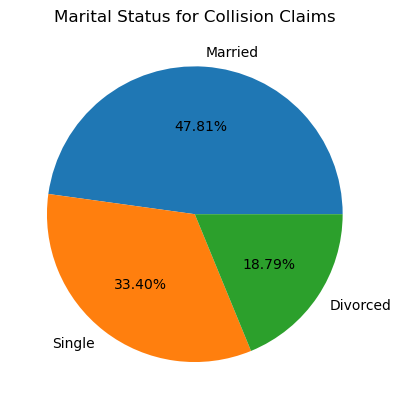

In [10]:
#marital will group together all the marital statuses for drivers who filed collision claims and provide a count for them
marital=df.loc[df['Claim Reason']=='Collision','Marital Status'].value_counts()
labels = list(marital.keys()) #list of marital statuses

y = [] #initialize empty list

#the for loop will loop through for each marital status
for reason in labels:
    y.append(marital[reason]) #adding the counts for the marital statuses to the list
    
#Now we will plot the distribution of marital statuses across the total number of collision claims in a pie chart     
plt.pie(y,labels=labels,autopct='%1.2f%%')
plt.title('Marital Status for Collision Claims')
plt.show()

Another conventional wisdom is that city/urban drivers are more reckless than suburban or rural drivers.

<font color = 'red'>The graphic below shows the distribution of client locations from all collision claims included in the data set. As we can see, only 15.19% of collision claims belong to urban drivers and the rest belong to suburban and rural drivers. From this we can conclude that this conventional wisdom does not pertain to our particular clientele. The issue with this assessment (and the other assessments thus far) is that our dataset could contain far more suburban/rural drivers than city drivers, which would dramatically skew our results. We can not come to a more accurate conclusion without this knowledge.</font>

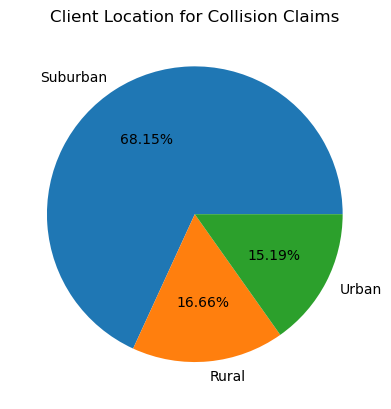

In [11]:
#location will group together all the location codes for drivers who filed collision claims and provide a count for them
location=df.loc[df['Claim Reason']=='Collision','Location Code'].value_counts()
labels = list(location.keys()) #list of location codes

y = [] #initialize empty list

#the for loop will loop through for each location code
for reason in labels:
    y.append(location[reason]) #adding the counts for the location codes to the list

#Now we will plot the distribution of location codes across the total number of collision claims in a pie chart
plt.pie(y,labels=labels,autopct='%1.2f%%')
plt.title('Client Location for Collision Claims')
plt.show()

Yet another conventional wisdom is that big cars equal big claims.

<font color = 'red'>Our data shows that average claim amount actually is highest for clients with 'small' vehicles and decreases for clients with 'medsize' vehicles. This average claim amount actually decreases even more dramatically once we look at the average claim amount for clients with 'large' vehicles. From this we can conclude that this is another false conventional wisdom.</font>

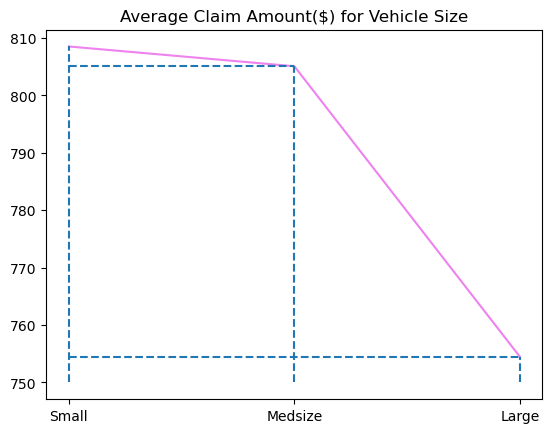

In [12]:
#size will group all vehicle sizes and provide a count for each of them 
size = df['Vehicle Size'].value_counts()
labels = ['Small','Medsize','Large'] #explicitly typing out the list so graph goes from small to large

y = [] #initalize empty list

#the for loop will loop through for each vehicle size
for reason in labels:
    total=df.loc[df['Vehicle Size']==reason,'Claim Amount'].mean() #calculates the average claim amount for each vehicle size
    y.append(total) #add averages to a list

#Now we plot the vehicle sizes vs the average claim amount in a line graph
plt.plot(labels,y,c='violet')
plt.vlines(labels, 750, y, linestyle="dashed")
plt.hlines(y, 0, labels, linestyle="dashed")
plt.title('Average Claim Amount($) for Vehicle Size')
plt.show()

Now we will ask the question: what does the data say about education and the claim amount?

<font color = 'red'>Below we see that clients whose education is listed as high school or below have the highest average claim amount while those whose education is listed as doctor have the lowest. It's hard to come to one conclusion from our dataset because the average claim amount continues to go up and down across increasing levels of education. In general, we can say that those who do not attend college at all have the highest claim amounts while those who attend college the longest have the lowest and the average claim amount varies in between.</font>

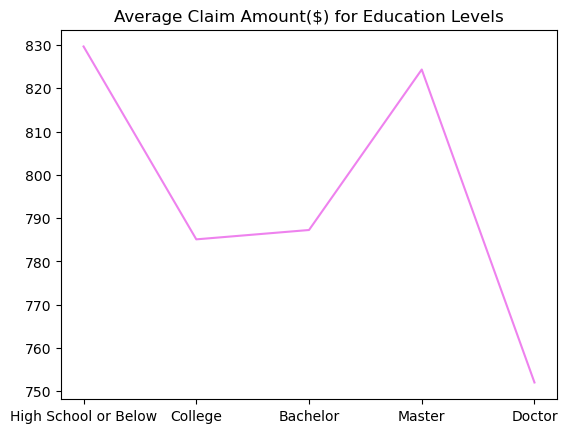

In [13]:
#size will group all education levels and provide a count for each of them 
education = df['Education'].value_counts()
labels = ['High School or Below','College','Bachelor','Master','Doctor'] #manually typing out list so graph goes from least to
                                                                         #to most education

y = [] #initalize empty list

#the for loop will loop through for each education level
for reason in labels:
    total=df.loc[df['Education']==reason,'Claim Amount'].mean() #calculates the average claim amount for each education level
    y.append(total) #add averages to a list

#Now we plot the education levels vs the average claim amount in a line graph
plt.plot(labels,y,c='violet')
plt.title('Average Claim Amount($) for Education Levels')
plt.show()

Of the states represented in our sample, is there one that we should probably look at dropping coverage of its drivers?

<font color = 'red'>From the graphic produced from our data, it is clear that Nebraska is the outlier of the States because the average claim amount for drivers in Nebraska is much lower than that of other states. KSM could consider dropping coverage for drivers from Nebraska because of this. After a high claim amount, insurance companies typically start charging higher premiums which would be favorable for KSM.</font>

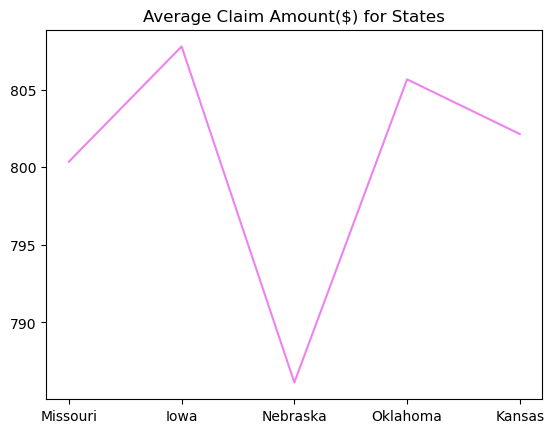

In [14]:
#size will group all States and provide a count for each of them 
states = df['State'].value_counts()
labels = list(states.keys()) #list of State names

y = [] #initialize empty list

#the for loop will loop through for each State
for reason in labels:
    total=df.loc[df['State']==reason,'Claim Amount'].mean() #calculates the average claim amount for each State
    y.append(total) #add averages to the list
    
#Now we plot the States vs the average claim amount in a line graph    
plt.plot(labels,y,c='violet')
plt.title('Average Claim Amount($) for States')
plt.show()